# Talib
### [Github說明](https://github.com/TA-Lib/ta-lib-python)
### [Talib庫詳解](https://www.fmz.com/bbs-topic/1234)

# Windows 安裝
### TA-Lib 在 Windows 的安裝不太友善，直接下 pip install ta-lib 會出現一堆錯誤訊息，官方提供的安裝方法如下：https://github.com/mrjbq7/ta-lib#windows

- 先到 https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib 下載 whl 檔，ex: python 的版本是 3.9，電腦是 64 位元，所以選的就是 TA_Lib‑0.4.24‑cp39‑cp39‑win_amd64.whl 這個檔案， 請依據自己的電腦環境選擇對應的檔案

# Mac OS X安裝
![](image\talib_macosx.png)

# Linux 安裝
![](image\talib_linux.png)

# Colab安裝
- 直接執行以下內容

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import talib
talib.__version__

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


'0.4.28'

# 指標名稱列表

In [2]:
import numpy as np
import pandas as pd
import talib

# 透過『get_function_groups』，取得分類後的技術指標清單
all_ta_groups = talib.get_function_groups()
Indicators = {  'Overlap Studies':'重疊研究類',
                'Momentum Indicators':'動量指標類',
                'Volume Indicators':'成交量指標類',
                'Volatility Indicators':'波動性指標類',
                'Price Transform':'價格指標類',
                'Cycle Indicators':'週期指標類',
                'Pattern Recognition':'形態識別類',
                'Statistic Functions':'統計函數類',
                'Math Transform':'數學變換類',
                'Math Operators':'數學運算符類'
             }

table = pd.DataFrame({
            '技術指標類別名稱(中文)': list(map(lambda x: Indicators.get(x), all_ta_groups.keys())),
            '技術指標類別名稱(英文)': list(all_ta_groups.keys()),
            '該類別指標總數': list(map(lambda x: len(x), all_ta_groups.values()))
        })
table

,技術指標類別名稱(中文),技術指標類別名稱(英文),該類別指標總數
0,週期指標類,Cycle Indicators,5
1,數學運算符類,Math Operators,11
2,數學變換類,Math Transform,15
3,動量指標類,Momentum Indicators,30
4,重疊研究類,Overlap Studies,17
5,形態識別類,Pattern Recognition,61
6,價格指標類,Price Transform,4
7,統計函數類,Statistic Functions,9
8,波動性指標類,Volatility Indicators,3
9,成交量指標類,Volume Indicators,3


In [6]:
import talib
print(len(talib.get_functions()))
#print(talib.get_functions())
for i, (k, v) in enumerate(all_ta_groups.items()):
    print(i+1, Indicators.get(k), ":", v)

158
1 週期指標類 : ['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE']
2 數學運算符類 : ['ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM']
3 數學變換類 : ['ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH']
4 動量指標類 : ['ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR']
5 重疊研究類 : ['BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA']
6 形態識別類 : ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWAL

# 查看指標屬性

In [6]:
#import talib
from talib import abstract
print('-'*20, '變數', '-'*20)
print(abstract.STOCH.parameters)
print()
print('-'*20, '屬性', '-'*20)
print(abstract.STOCH.output_names)

-------------------- 變數 --------------------
OrderedDict([('fastk_period', 5), ('slowk_period', 3), ('slowk_matype', 0), ('slowd_period', 3), ('slowd_matype', 0)])

-------------------- 屬性 --------------------
['slowk', 'slowd']


In [5]:
abstract.MACD.parameters

OrderedDict([('fastperiod', 12), ('slowperiod', 26), ('signalperiod', 9)])

In [6]:
abstract.MACD.output_names

['macd', 'macdsignal', 'macdhist']

In [7]:
abstract.RSI.parameters

OrderedDict([('timeperiod', 14)])

#  調整參數

In [8]:
params = dict(abstract.STOCH.parameters)
#for name, var in params.items():
#    params[name] = var * 2
params['fastk_period'] = 9
params

{'fastk_period': 9,
 'slowk_period': 3,
 'slowk_matype': 0,
 'slowd_period': 3,
 'slowd_matype': 0}

# 指標計算

In [8]:
import pandas as pd
import talib
from talib import abstract
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()
df = pdr.get_data_yahoo('2330.TW', start='2022-1-1', end='2022-12-31')

df = df.reset_index('Date')
df.columns = ['date', 'high', 'low', 'open', 'close', 'volume', 'adj Close']
df = df[['date', 'open', 'high', 'low', 'close', 'volume', 'adj Close']]
df['volume'] = df['volume'].apply(lambda x :x/1000)

df.head()

[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close,volume,adj Close
0,2022-01-03,618.0,619.0,632.0,631.0,0.607793,69089158
1,2022-01-04,644.0,645.0,656.0,656.0,0.631874,79434666
2,2022-01-05,646.0,669.0,669.0,650.0,0.626094,69593809
3,2022-01-06,636.0,638.0,646.0,644.0,0.620315,53210211
4,2022-01-07,632.0,643.0,646.0,634.0,0.610683,38249908


In [10]:
df['close'].rolling(5).mean()

0        NaN
1        NaN
2        NaN
3        NaN
4      643.0
       ...  
241    459.2
242    459.1
243    457.5
244    453.1
245    451.8
Name: close, Length: 246, dtype: float64

In [9]:
abstract.SMA.parameters

OrderedDict([('timeperiod', 30)])

In [11]:
SMA5 = abstract.SMA(df, 5)
SMA10 = abstract.SMA(df, 10)
SMA5

0        NaN
1        NaN
2        NaN
3        NaN
4      643.0
       ...  
241    459.2
242    459.1
243    457.5
244    453.1
245    451.8
Length: 246, dtype: float64

In [ ]:
RSI = abstract.RSI(df, 14)
RSI

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
137    51.174457
138    53.809268
139    55.113552
140    55.113552
141    50.942843
Length: 142, dtype: float64

In [ ]:
STOCH = abstract.STOCH(df)
STOCH

,slowk,slowd
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
377,73.611111,67.863985
378,23.611111,57.854406
379,7.702020,34.974747
380,36.868687,22.727273


In [ ]:
MACD = abstract.MACD(df)  
MACD

,macd,macdsignal,macdhist
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
377,-1.866785,-0.145764,-1.721021
378,-2.444881,-0.605588,-1.839293
379,-2.949715,-1.074413,-1.875302
380,-2.992537,-1.458038,-1.534499


# 計算所有指標

HT_DCPERIOD


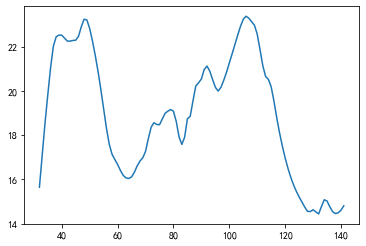

HT_DCPHASE


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


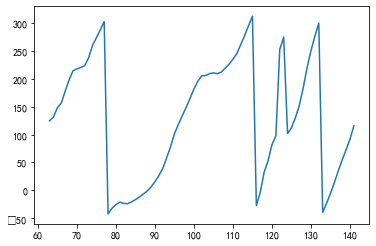

HT_PHASOR


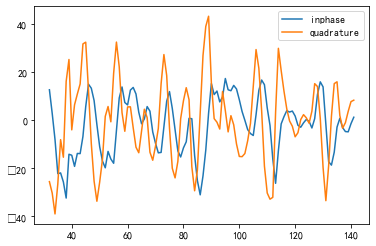

HT_SINE


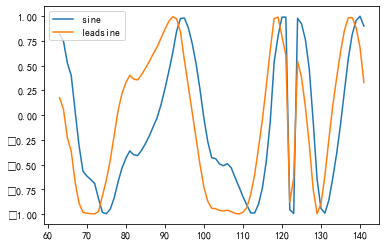

HT_TRENDMODE


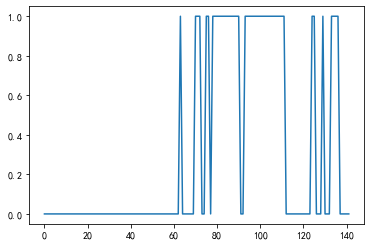

ADD


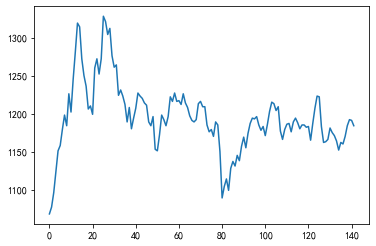

DIV


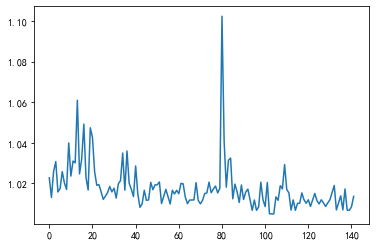

MAX


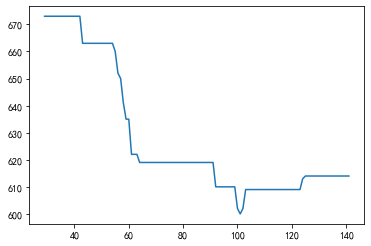

MAXINDEX


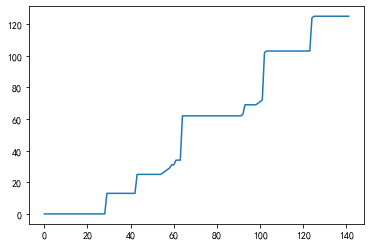

MIN


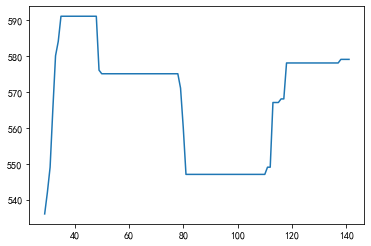

MININDEX


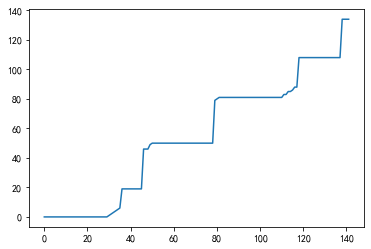

MINMAX


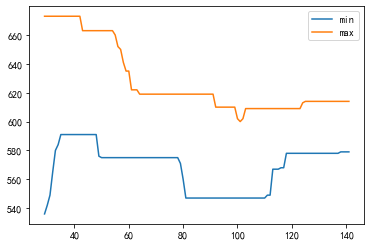

MINMAXINDEX


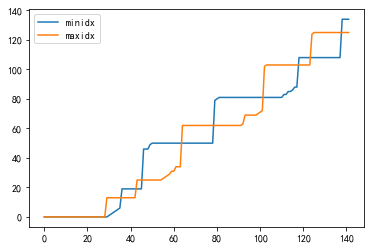

MULT


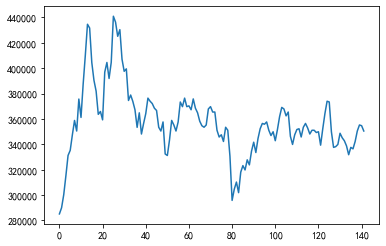

SUB


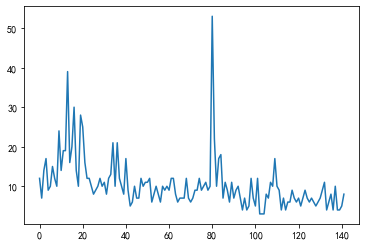

SUM


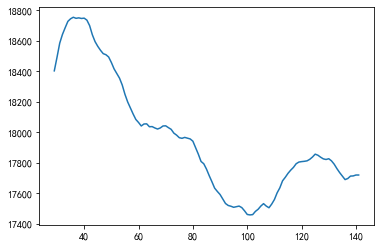

ACOS


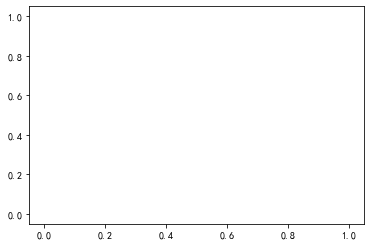

ASIN


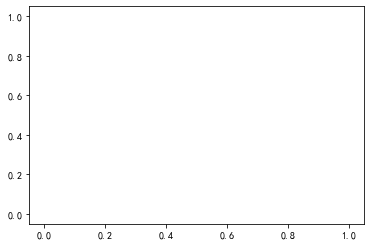

ATAN


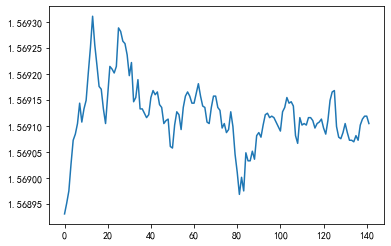

CEIL


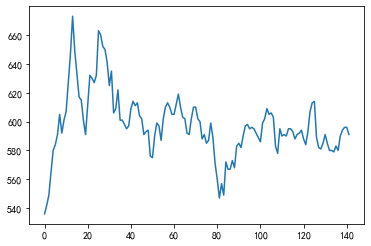

COS


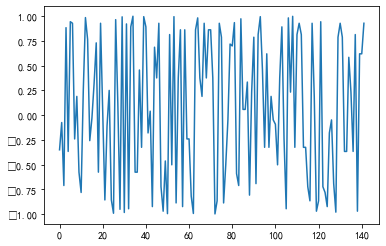

COSH


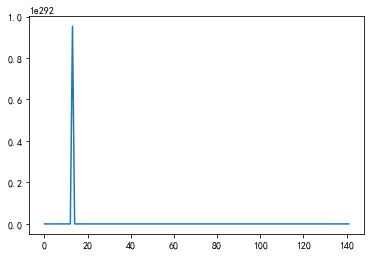

EXP


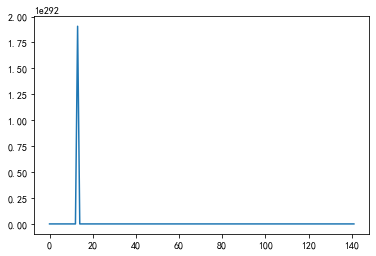

FLOOR


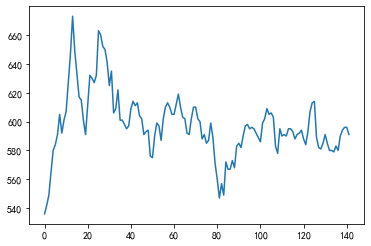

LN


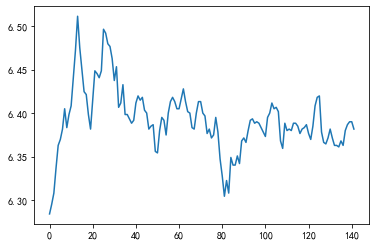

LOG10


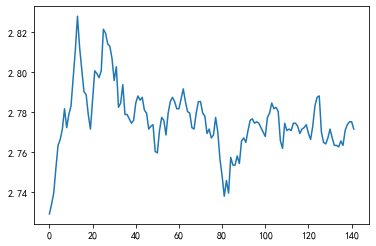

SIN


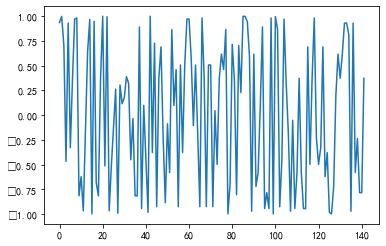

SINH


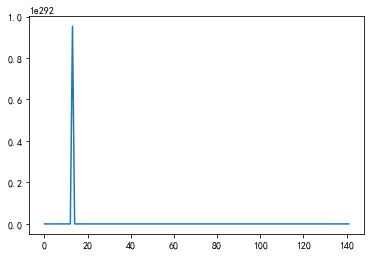

SQRT


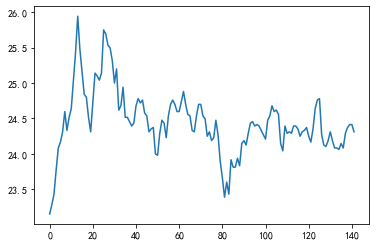

TAN


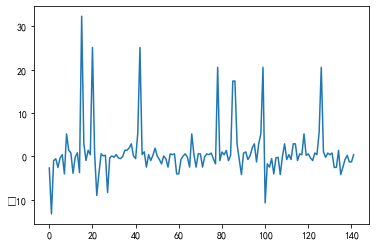

TANH


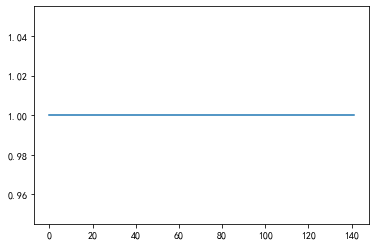

ADX


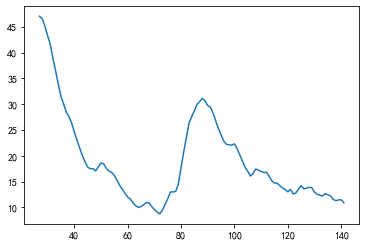

ADXR


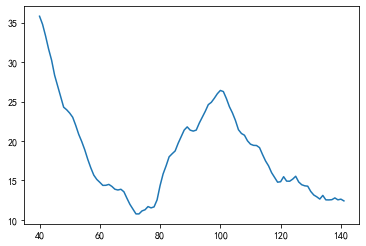

APO


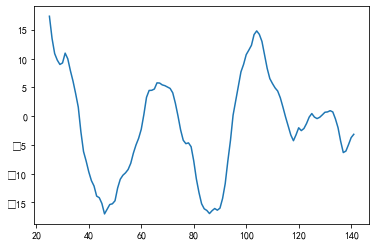

AROON


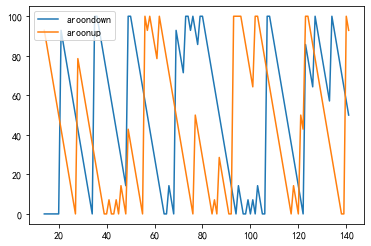

AROONOSC


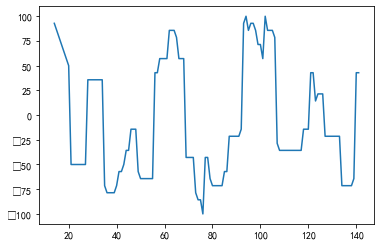

BOP


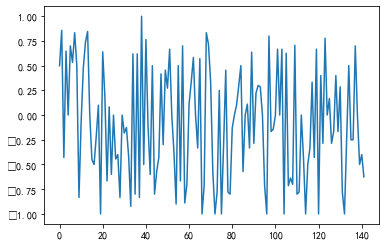

CCI


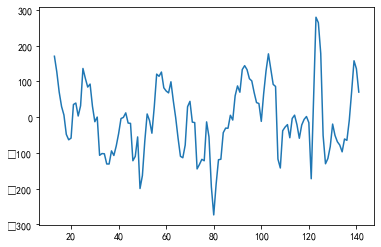

CMO


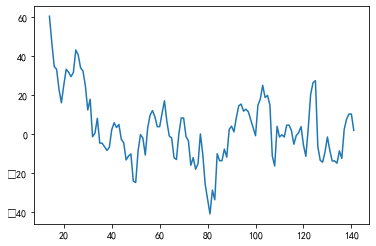

DX


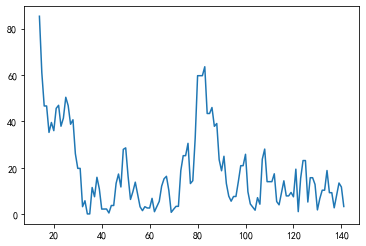

MACD


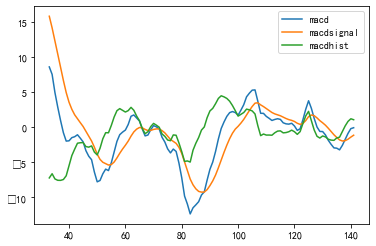

MACDEXT


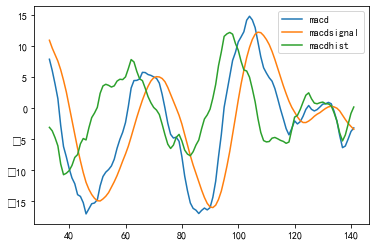

MACDFIX


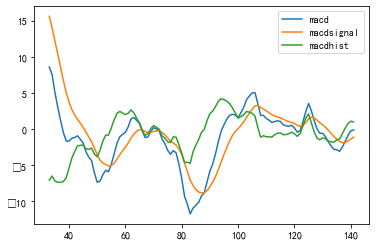

MFI


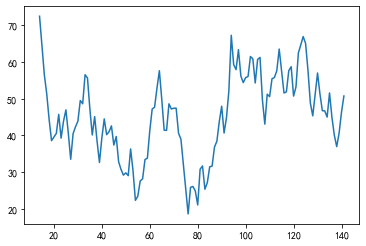

MINUS_DI


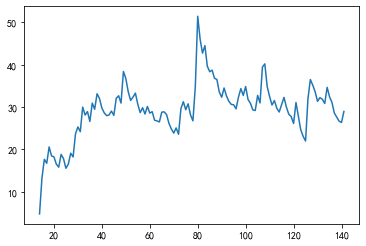

MINUS_DM


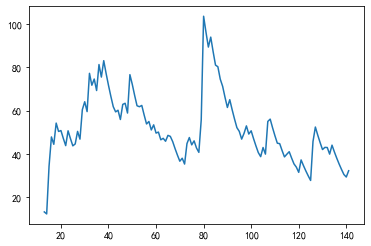

MOM


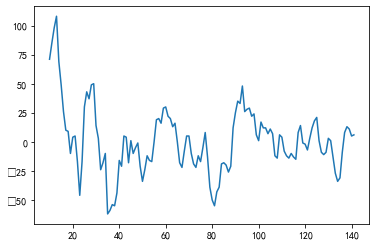

PLUS_DI


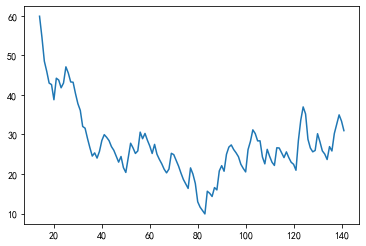

PLUS_DM


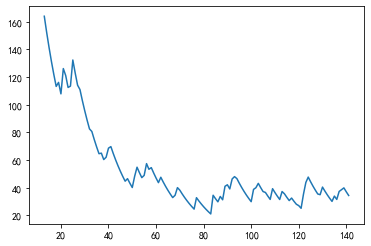

PPO


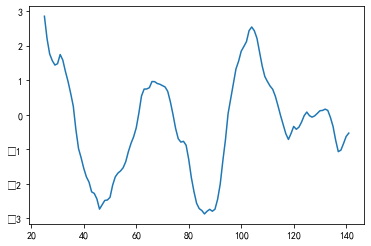

ROC


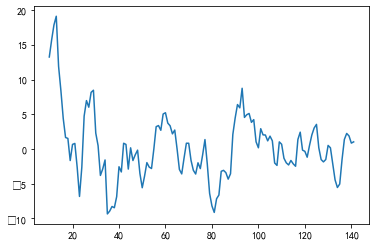

ROCP


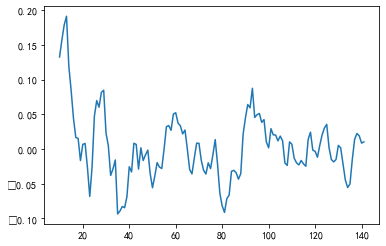

ROCR


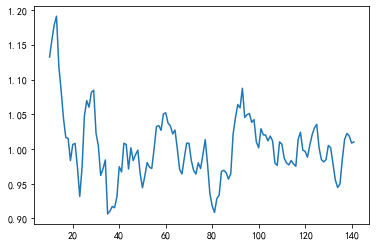

ROCR100


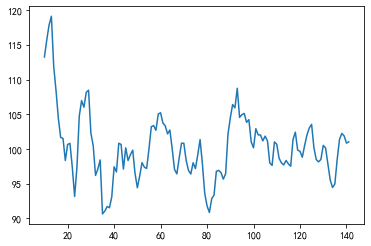

RSI


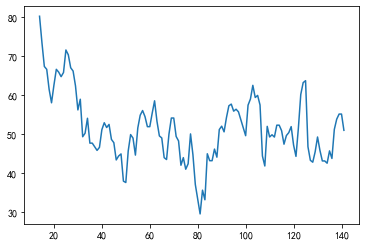

STOCH


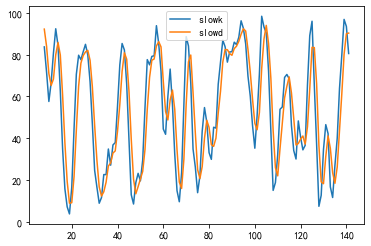

STOCHF


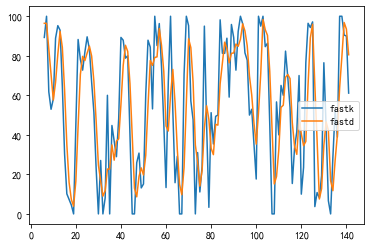

STOCHRSI


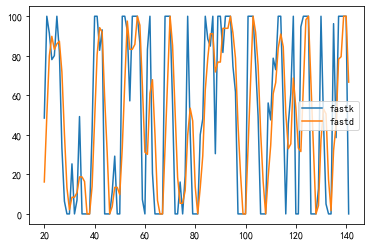

TRIX


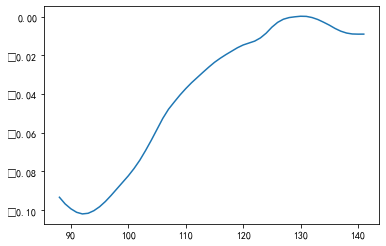

ULTOSC


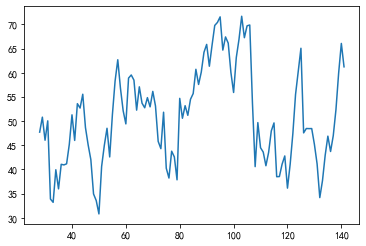

WILLR


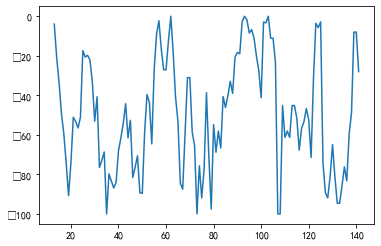

BBANDS


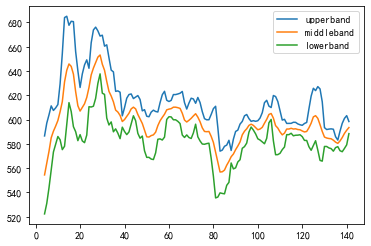

DEMA


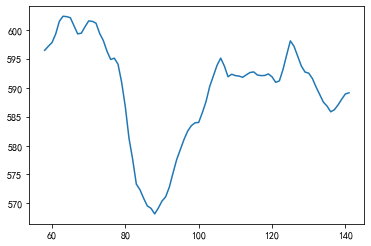

EMA


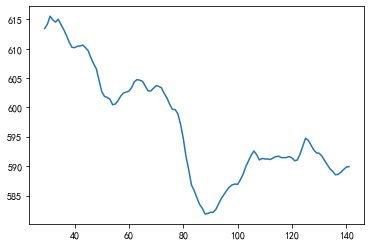

HT_TRENDLINE


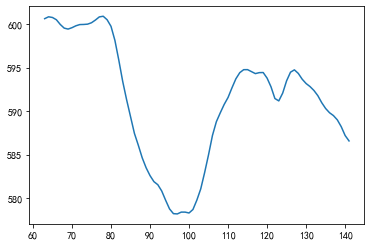

KAMA


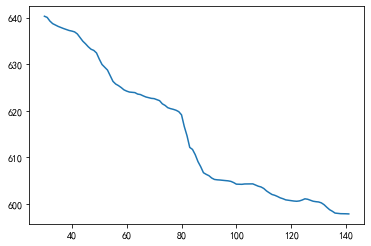

MA


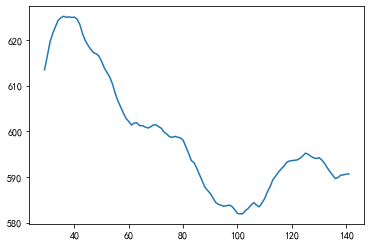

MAMA


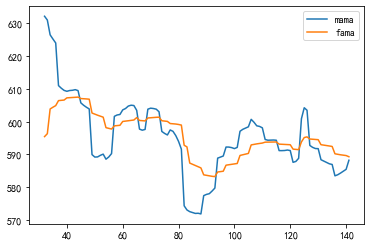

MIDPOINT


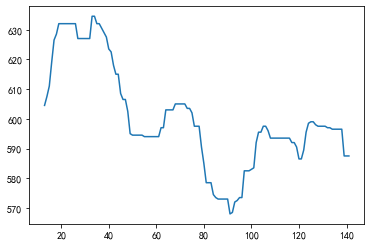

MIDPRICE


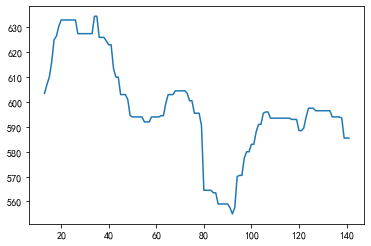

SAR


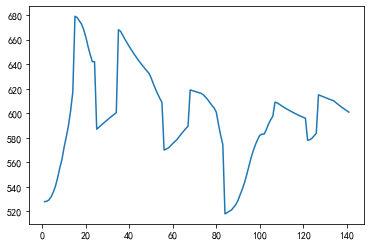

SAREXT


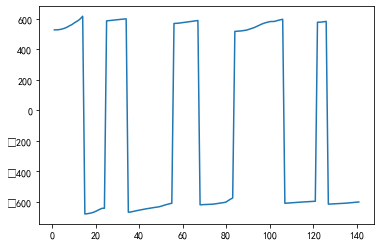

SMA


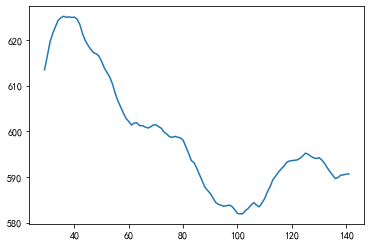

T3


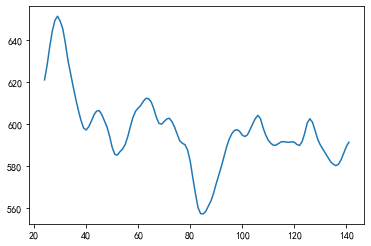

TEMA


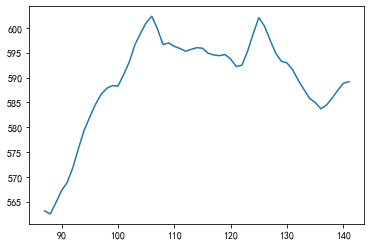

TRIMA


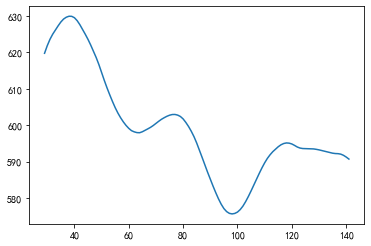

WMA


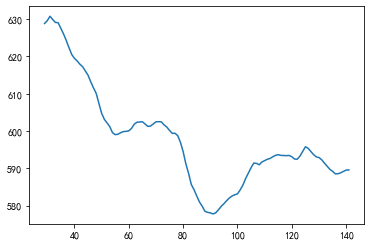

AVGPRICE


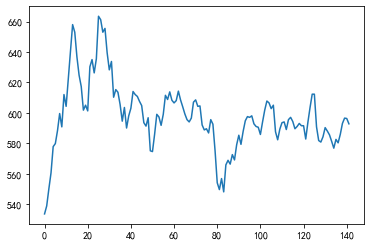

MEDPRICE


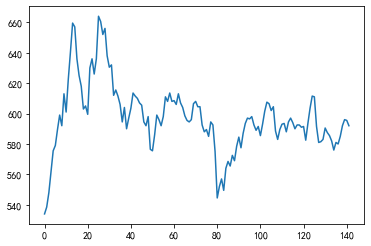

TYPPRICE


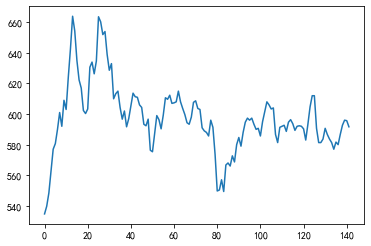

WCLPRICE


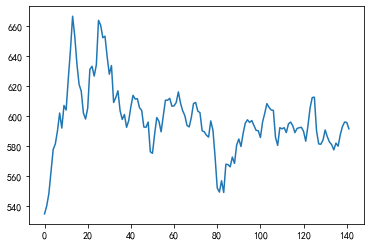

BETA


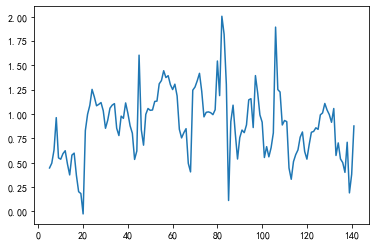

CORREL


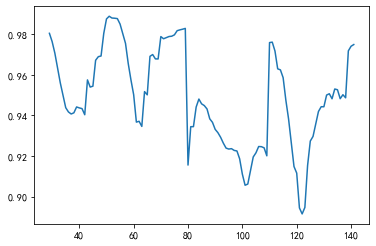

LINEARREG


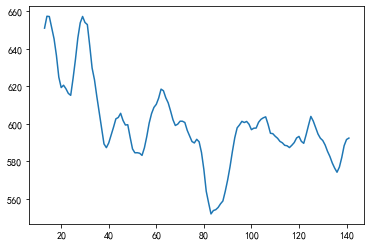

LINEARREG_ANGLE


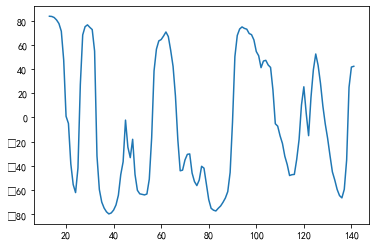

LINEARREG_INTERCEPT


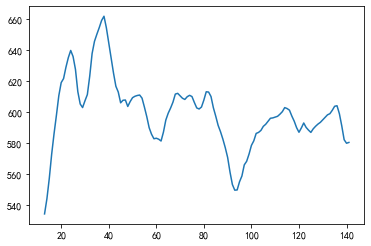

LINEARREG_SLOPE


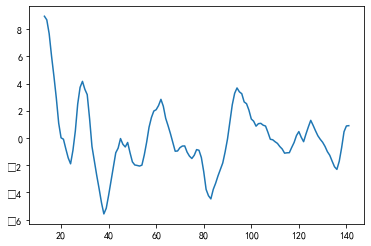

STDDEV


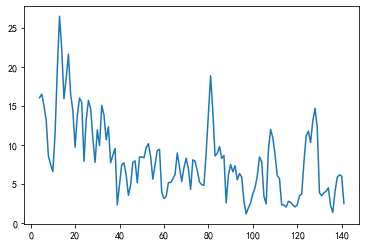

TSF


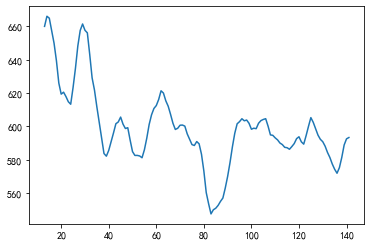

VAR


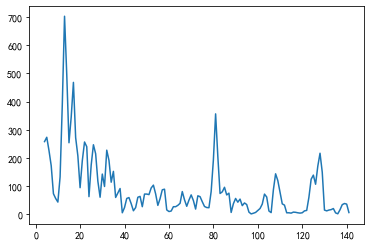

ATR


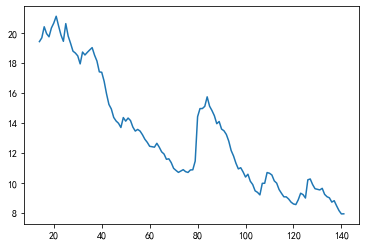

NATR


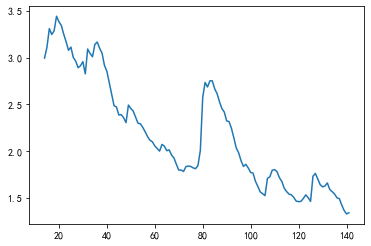

TRANGE


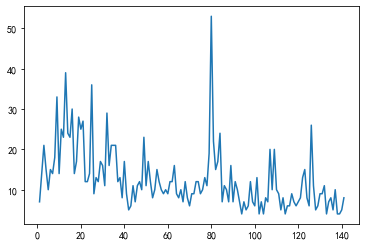

AD


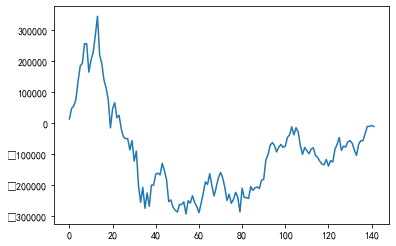

ADOSC


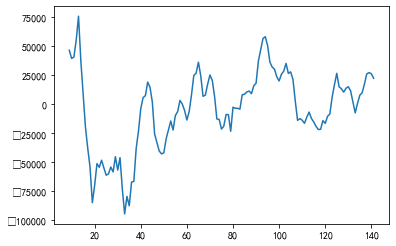

OBV


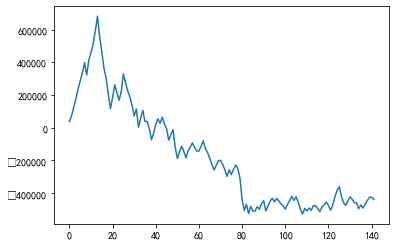

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

indicators = {}
for name in talib.get_functions():    
    if name == 'MAVP' or name[:3] == 'CDL':
        continue

    f = getattr(abstract, name)
    indicators[name] = f(df)
    
for name, indicator in indicators.items():
    print(name)
    indicator.plot()
    plt.show()

### 三烏鴉

In [12]:
from talib.abstract import *
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()
start = '2020-01-01'
df = pdr.get_data_yahoo('2330.TW', start)
df = df.reset_index()
df.columns = ['date', 'open', 'high', 'low', 'close', 'adj close', 'volume']
data = CDL3BLACKCROWS(df)

flag = False
for i in range(len(data)):
    signal = data[i]
    if signal!=0:
        print(data[i], "有訊號")
        flag = True
if flag == False:
    print("無訊號")

[*********************100%***********************]  1 of 1 completed
無訊號


### 三白兵

In [13]:
from talib.abstract import *
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()
start = '2020-01-01'
df = pdr.get_data_yahoo('2330.TW', start)
df = df.reset_index()
df.columns = ['date', 'open', 'high', 'low', 'close', 'adj close', 'volume']
data = CDL3WHITESOLDIERS(df)

flag = False
for i in range(len(data)):
    signal = data[i]
    if signal!=0:
        print(data[i], "有訊號")
        flag = True
if flag == False:
    print("無訊號")

[*********************100%***********************]  1 of 1 completed
無訊號


### 棄嬰

In [14]:
from talib.abstract import *
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()
start = '2020-01-01'
df = pdr.get_data_yahoo('2330.TW', start)
df = df.reset_index()
df.columns = ['date', 'open', 'high', 'low', 'close', 'adj close', 'volume']
data = CDLABANDONEDBABY(df)

flag = False
for i in range(len(data)):
    signal = data[i]
    if signal!=0:
        print(data[i], "有訊號")
        flag = True
if flag == False:
    print("無訊號")

[*********************100%***********************]  1 of 1 completed
無訊號


### 母子線

In [17]:
from talib.abstract import *
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()
start = '2020-01-01'
df = pdr.get_data_yahoo('2330.TW', start)
df = df.reset_index()
df.columns = ['date', 'open', 'high', 'low', 'close', 'adj close', 'volume']
data = CDLHARAMI(df)

flag = False
for i in range(len(data)):
    signal = data[i]
    if signal!=0:
        print(data[i], "有訊號", df.iloc[i])
        flag = True
if flag == False:
    print("無訊號")

[*********************100%***********************]  1 of 1 completed
-100 有訊號 date         2020-01-17 00:00:00
open                       334.0
high                       335.5
low                        332.0
close                      333.0
adj close             306.528503
volume                  52060097
Name: 11, dtype: object
100 有訊號 date         2020-01-31 00:00:00
open                       323.0
high                       323.5
low                        319.0
close                      320.0
adj close              294.56192
volume                  62526055
Name: 14, dtype: object
100 有訊號 date         2020-02-05 00:00:00
open                       329.0
high                       329.5
low                        324.5
close                      327.5
adj close              301.46579
volume                  36601453
Name: 17, dtype: object
100 有訊號 date         2020-04-06 00:00:00
open                       273.0
high                       275.5
low                        270.0
c

### 十字孕線

In [16]:
from talib.abstract import *
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()
start = '2020-01-01'
df = pdr.get_data_yahoo('2330.TW', start)
df = df.reset_index()
df.columns = ['date', 'open', 'high', 'low', 'close', 'adj close', 'volume']
data = CDLHARAMICROSS(df)

flag = False
for i in range(len(data)):
    signal = data[i]
    if signal!=0:
        print(data[i], "有訊號", df.iloc[i])
        flag = True
if flag == False:
    print("無訊號")

[*********************100%***********************]  1 of 1 completed
100 有訊號 date         2020-10-21 00:00:00
open                       453.5
high                       456.0
low                        451.0
close                      453.0
adj close             426.735352
volume                  28058921
Name: 193, dtype: object
100 有訊號 date         2020-11-26 00:00:00
open                       489.0
high                       493.5
low                        488.0
close                      489.0
adj close             460.648102
volume                  28893033
Name: 219, dtype: object
100 有訊號 date         2020-12-01 00:00:00
open                       489.5
high                       490.0
low                        483.5
close                      490.0
adj close             461.590118
volume                  37018651
Name: 222, dtype: object
100 有訊號 date         2021-01-18 00:00:00
open                       608.0
high                       608.0
low                        594.0

# 指標介紹
#### - K線 [連結](https://www.jihsun.com.tw/md/event/jsun_school/stock7.html)
#### - 均線 [連結](https://www.jihsun.com.tw/md/event/jsun_school/stock8.html)
#### - KD [連結](https://www.jihsun.com.tw/md/event/jsun_school/stock9.html)
#### - RSI [連結](https://www.jihsun.com.tw/md/event/jsun_school/stock10.html)
#### - MACD [連結](https://www.jihsun.com.tw/md/event/jsun_school/stock12.html)

# 均線MA

[*********************100%***********************]  1 of 1 completed


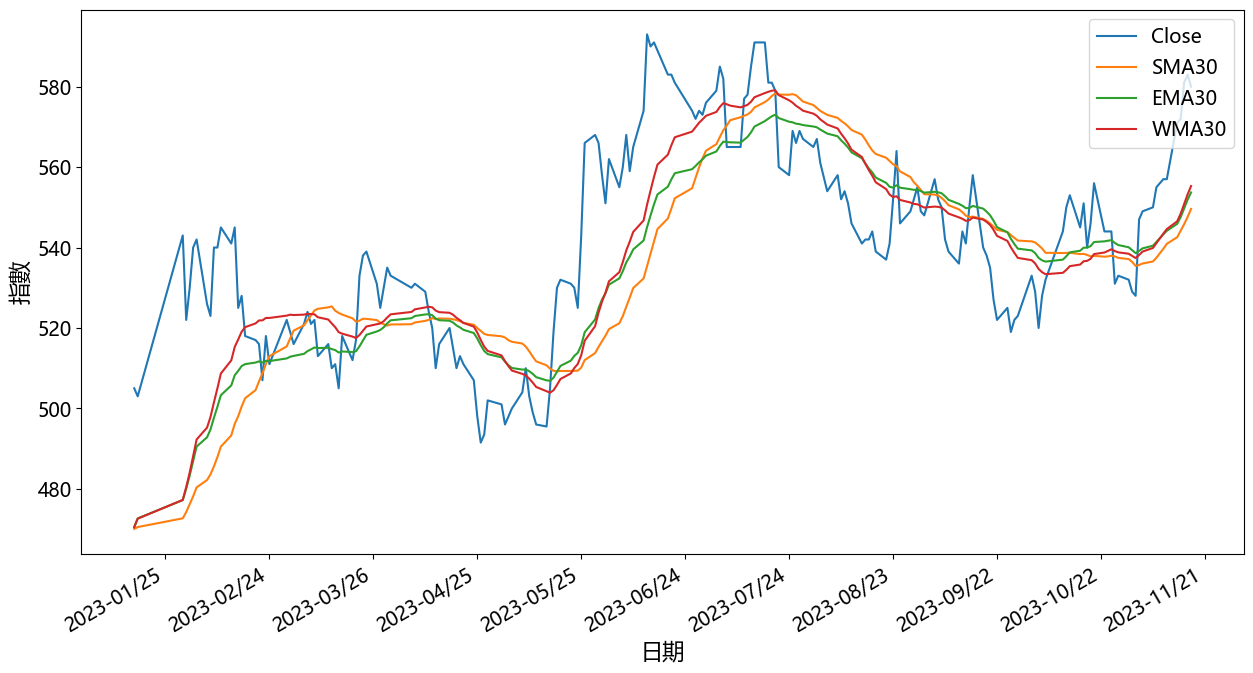

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import talib
import platform
from pandas_datareader import data as pdr
import matplotlib.dates as mdates
import yfinance as yfin

#依據作業系統設定字型
sysstr = platform.system()
version = platform.release()
if(sysstr =="Windows"):
    if (version == '7'):
        plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
    elif (version == '8' or version == '8.1'):
        plt.rcParams['font.sans-serif'] = 'SimHei'
    else:
        plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
elif(sysstr == "Linux"):
    print ("Call Linux tasks")
elif(sysstr == "Darwin"):
    print ("Call Mac os tasks")    
else:
    print ("Other System tasks")  
plt.rcParams['axes.unicode_minus'] = False  

yfin.pdr_override()
start = '2020-01-01'
df = pdr.get_data_yahoo('2330.TW', start)

df['SMA30'] = talib.SMA(df['Close'], timeperiod=30) #移動平均線
df['EMA30'] = talib.EMA(df['Close'], timeperiod=30) #指數移動平均線
df['WMA30'] = talib.WMA(df['Close'], timeperiod=30) #加權移動平均線

df1 = df.tail(200) #tail指最新的資料
df1[['Close','SMA30','EMA30','WMA30']].plot(figsize=(15, 8))
plt.xlabel('日期', fontsize=16)
plt.ylabel('指數', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 1, fontsize=14)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.show()

In [4]:
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-11-06', '2023-11-07', '2023-11-08', '2023-11-09',
               '2023-11-10', '2023-11-13', '2023-11-14', '2023-11-15',
               '2023-11-16', '2023-11-17'],
              dtype='datetime64[ns]', name='Date', length=943, freq=None)

# 法1：KD + 雙Y座標 secondary_y=True

[*********************100%***********************]  1 of 1 completed


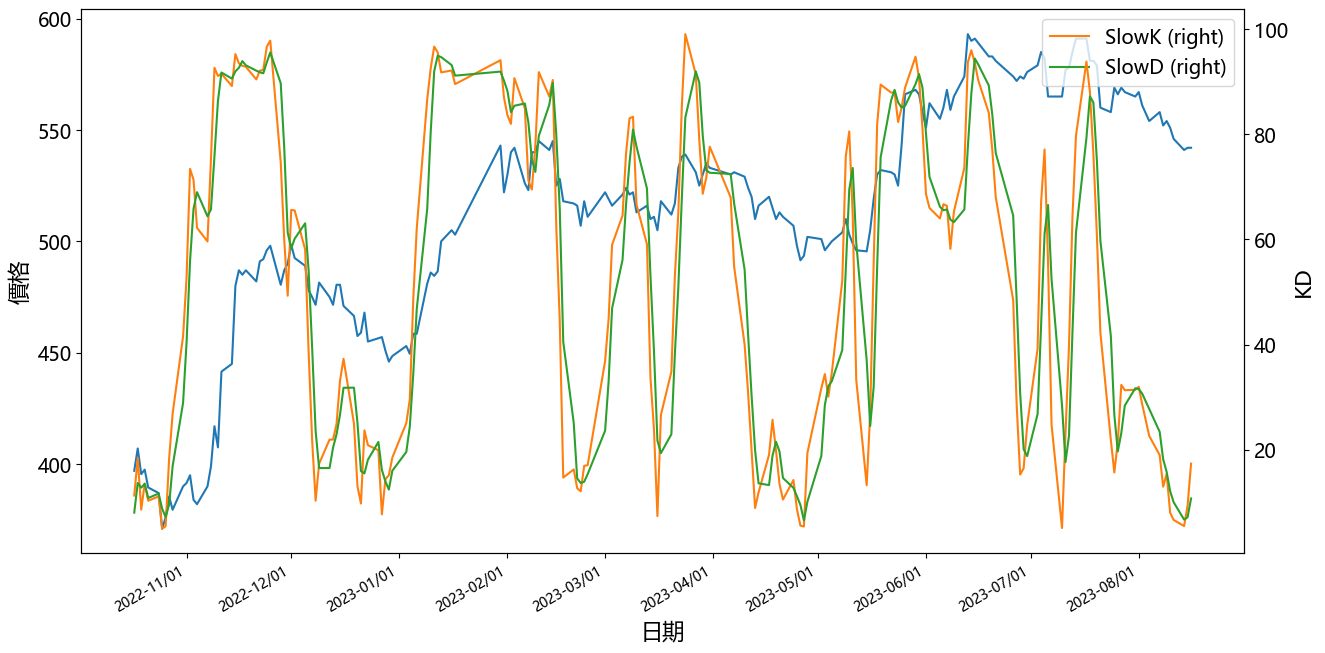

In [12]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import matplotlib.dates as mdates
import warnings
import talib
import yfinance as yfin
warnings.filterwarnings('ignore') #呼略警告訊息

#依據作業系統設定字型
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False  

yfin.pdr_override()
start = '2020-01-01'
df = pdr.get_data_yahoo('2330.TW', start)

df['SlowK'], df['SlowD'] = talib.STOCH(df['High'], df['Low'], df['Close'], fastk_period = 9, slowk_period=3, slowd_period=3)
df1 = df.tail(200)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

#繪製收盤價
ax.plot(df1['Close'])
ax.set_xlabel("日期", fontsize=16)
ax.set_ylabel("價格", fontsize=16)

#設定X軸
#ax.set_xticks(df1.index[::50])
#ax.set_xticks(ax.get_xticks()[::2])
#ax.set_xticklabels(df1.index[::10], fontsize=16, rotation = 30)
#ax.xaxis.set_tick_params(labelsize=14)

#設定主Y軸字體大小
ax.yaxis.set_tick_params(labelsize=14)

#加入KD資料
df1.index.name = '日期'
ax1 = df1[['SlowK','SlowD']].plot(ax=ax, secondary_y=True, legend = False)
#ax1.set_xticklabels(df1.index[::20], fontsize=16)

#設定次Y軸字體大小
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_ylabel( "KD", fontsize=16)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m/%d'))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax1.get_legend_handles_labels()
ax.legend(handles = h1 + h2, labels = l1+l2, loc=1, fontsize=14)
plt.show()

[*********************100%***********************]  1 of 1 completed


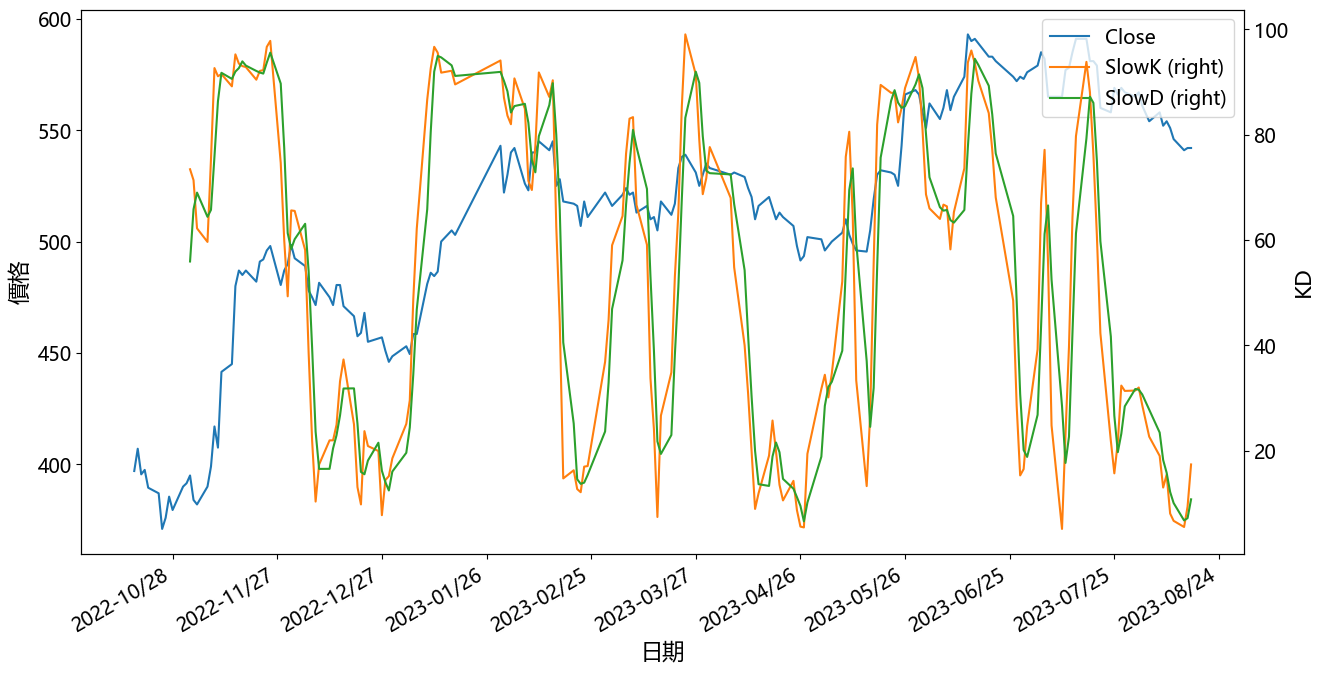

In [14]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas_datareader import data as pdr
import talib
import yfinance as yfin
   
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False  

yfin.pdr_override()
start = '2020-01-01'
df = pdr.get_data_yahoo('2330.TW', start)

df1['SlowK'], df1['SlowD'] = talib.STOCH(df1['High'], df1['Low'], df1['Close'], fastk_period = 9, slowk_period=3, slowd_period=3)
df2 = df1.tail(200)

ax = df2['Close'].plot(figsize=(15, 8))
plt.xlabel("日期", fontsize=16)
plt.ylabel('價格', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

df2.index.name = '日期'
ax2 = df2[['SlowK','SlowD']].plot(ax=ax, secondary_y=['SlowK', 'SlowD'], legend = False) #這行導致X軸變為Date，藉由上一行設定index.name為"日期"來改善

plt.ylabel('KD', fontsize=16)
plt.xticks( fontsize=14)
plt.yticks(fontsize=14)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=1, fontsize=14)
plt.show()

# 法2：KD + 雙Y座標

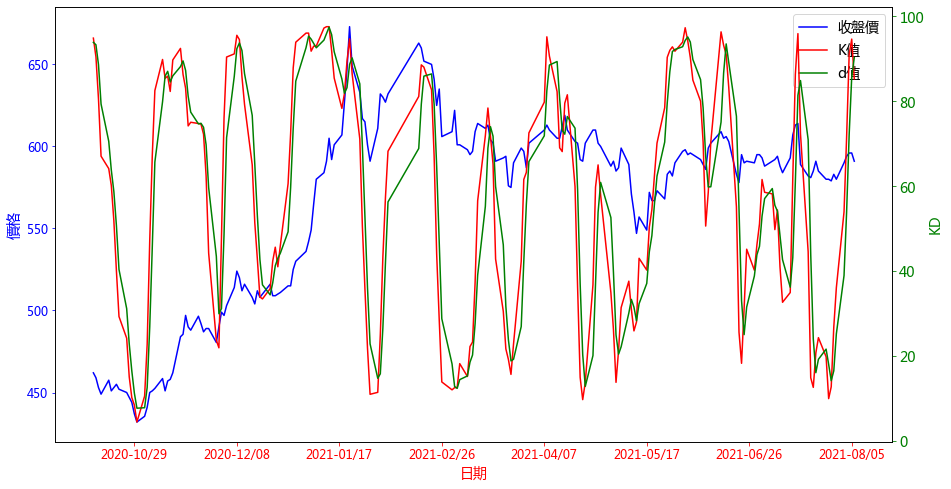

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import talib
import matplotlib.dates as mdates
from pandas_datareader import data as pdr
import yfinance as yfin
import warnings 
warnings.filterwarnings('ignore')
 
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False 

yfin.pdr_override()
start = '2020-01-01'
df1 = pdr.get_data_yahoo('2330.TW', start)

df1 = df1.reset_index('Date')
df1['SlowK'], df1['SlowD'] = talib.STOCH(df1['High'], df1['Low'], df1['Close'], fastk_period = 9, slowk_period=3, slowd_period=3)
#df1['Date'] = df1['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

df2 = df1.tail(200)
date, colse = df2['Date'], df2['Close']
k, d = df2['SlowK'], df2['SlowD']

#主座標
fig, ax1 = plt.subplots(figsize = (15,8))
ax1.set_xlabel('日期', fontsize=14, color='r')
ax1.set_ylabel('價格', fontsize=14, color='b')
#與以上寫法相同
#plt.xlabel('日期', fontsize=16)
#plt.ylabel('價格', fontsize=16)

plt.xticks(fontsize=12)
#ax1.set_xticklabels(date[::10], fontsize=12)
plt.yticks(fontsize=12)
ax1.tick_params(axis='x', colors = 'r')
ax1.tick_params(axis='y', colors = 'b')
#與以上寫法相同
#ax1.tick_params(axis='both', labelsize=14)

#次座標
ax2 = ax1.twinx()
#ax2 = df1[['SlowK','SlowD']].plot(ax=ax1, secondary_y=True, legend = False)

ax2.set_ylabel('KD', fontsize=14, color='g')
ax2.tick_params(axis='y', labelsize=14, colors = 'g')

#主Y軸
ax1.plot(date, colse, 'b', label="收盤價")

#次Y軸
ax2.plot(date, k, 'r', label="K值")
ax2.plot(date, d, 'g', label="d值")

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m/%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=40))

#圖例設定
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=1, fontsize=14)

plt.show()

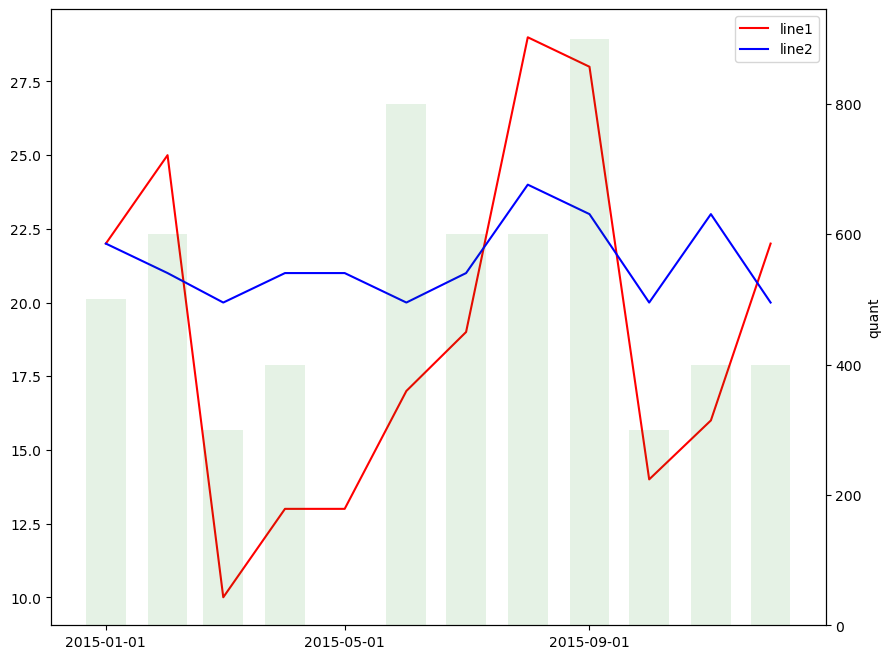

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

np.random.seed(0)
df1 = pd.DataFrame(dict(date=pd.date_range('2015-01-01', periods=12, freq='MS'), line1=np.random.randint(10, 30, 12), line2=np.random.randint(20, 25, 12))).set_index('date')
df2 = pd.DataFrame(dict(date=pd.date_range('2015-01-01', periods=12, freq='MS'), quant=100*np.random.randint(3, 10, 12))).set_index('date')
df2 = df2.drop(df2.index[4])

#fig, ax = plt.subplots(figsize=(10, 8))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df1.index, df1.line1, label='line1', c='r')
ax.plot(df1.index, df1.line2, label='line2', c='b')
ax2 = ax.twinx()
ax2.set_ylabel('quant')
ax2.bar(df2.index, df2.quant, width=20, alpha=0.1, color='g', label='quant')
ax.legend(loc='best')
ax.set_xticks(ax.get_xticks()[::2])

# RSI 預設值以14為主

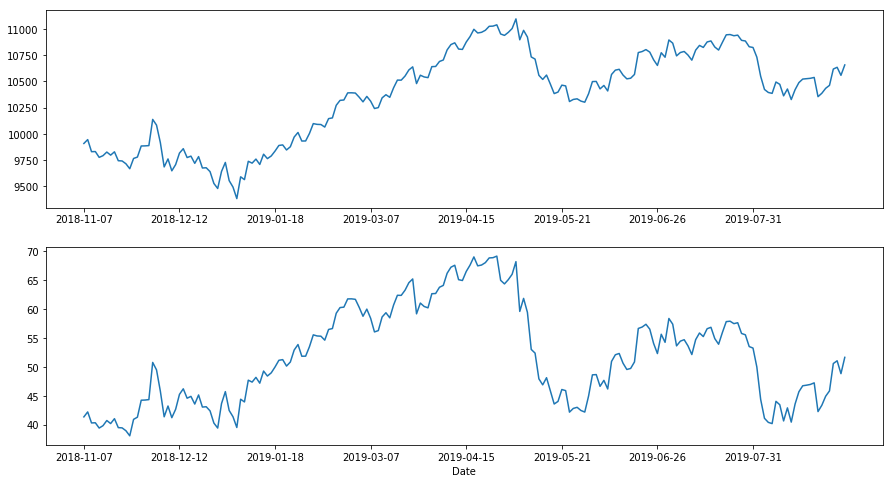

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import talib

df = pd.read_csv('^TWII.csv')
df = df.set_index('Date')
df['RSI30'] = talib.RSI(df['Close'], timeperiod=30)
df1 = df.tail(200)

fig, ax = plt.subplots(nrows=2, figsize=(15, 8))
#df1['Close'].plot(ax=ax[0], figsize=(15, 8))
ax[0].plot(df1.index, df1['Close'])
ax[0].set_xticks(range(0, len(df1.index), 25))
ax[0].set_xticklabels(df1.index[::25])

df1['RSI30'].plot(ax=ax[1])
ax[1].set_xticks(range(0, len(df1.index), 25))
ax[1].set_xticklabels(df1.index[::25])
plt.show()

# MACD

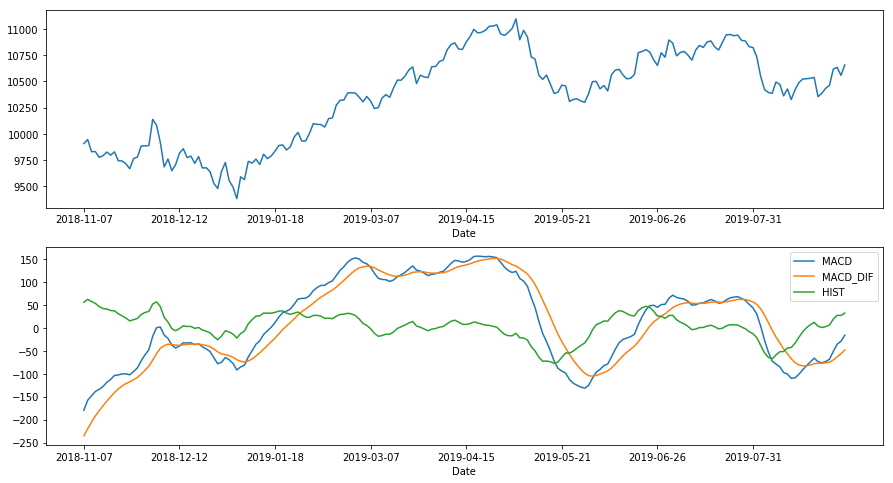

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import talib

df = pd.read_csv('^TWII.csv')
df = df.set_index('Date')

df['MACD'], df['MACD_DIF'], df['HIST'] = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df1 = df.tail(200)

fig, axes = plt.subplots(nrows=2)
df1['Close'].plot(ax=axes[0], figsize=(15, 8))
axes[0].set_xticks(range(0, len(df1.index), 25))
axes[0].set_xticklabels(df1.index[::25])

df1[['MACD', 'MACD_DIF', 'HIST']].plot(ax=axes[1], figsize=(15, 8))
axes[1].set_xticks(range(0, len(df1.index), 25))
axes[1].set_xticklabels(df1.index[::25])
plt.show()

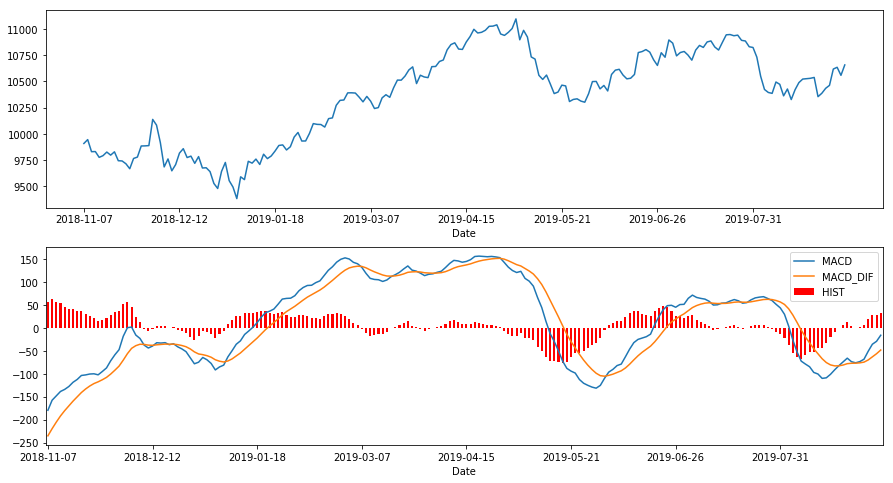

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import talib

df = pd.read_csv('^TWII.csv')
df = df.set_index('Date')

df['MACD'], df['MACD_DIF'], df['HIST'] = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df1 = df.tail(200)

fig, axes = plt.subplots(nrows=2)

df1['Close'].plot(ax=axes[0], figsize=(15, 8))
axes[0].set_xticks(range(0, len(df1.index), 25))
axes[0].set_xticklabels(df1.index[::25], rotation=0)

ax = df1[['MACD', 'MACD_DIF']].plot(ax=axes[1], figsize=(15, 8))
df1['HIST'].plot(ax=ax, kind='bar', legend=True, color = 'r')
axes[1].set_xticks(range(0, len(df1.index), 25))
axes[1].set_xticklabels(df1.index[::25], rotation=0)

plt.show()

In [7]:
! pip install mplfinance
! pip install mpl-finance

     -------------------------------------- 75.0/75.0 kB 689.1 kB/s eta 0:00:00


In [12]:
import mplfinance
mplfinance

<module 'mplfinance' from 'C:\\Users\\Lo yuan\\anaconda3\\lib\\site-packages\\mplfinance\\__init__.py'>

In [11]:
candlestick2_ohlc

<function mplfinance.original_flavor.candlestick2_ohlc(ax, opens, highs, lows, closes, width=4, colorup='k', colordown='r', alpha=0.75)>

(<matplotlib.collections.LineCollection at 0x190095c5990>,
 <matplotlib.collections.PolyCollection at 0x1900a066890>)

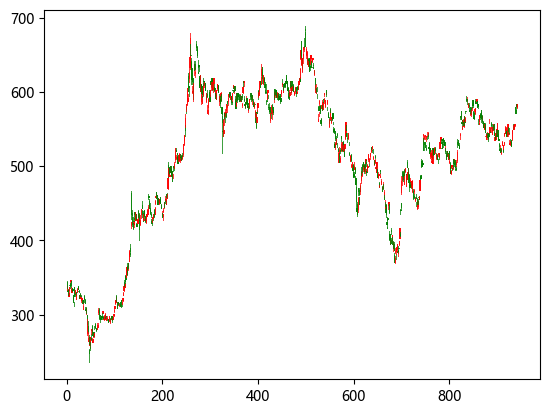

In [13]:
from mplfinance.original_flavor import candlestick2_ohlc
fig, ax = plt.subplots(1,1)
candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'], 
                  width=0.5, colorup='r', colordown='g', alpha=0.75)

In [17]:
df['Date'].dt.strftime('%Y-%m-%d')

58     2020-04-07
59     2020-04-08
60     2020-04-09
61     2020-04-10
62     2020-04-13
          ...    
203    2020-11-04
204    2020-11-05
205    2020-11-06
206    2020-11-09
207    2020-11-10
Name: Date, Length: 150, dtype: object

(<matplotlib.collections.LineCollection at 0x1d4d2ee09a0>,
 <matplotlib.collections.PolyCollection at 0x1d4d2f297b0>)

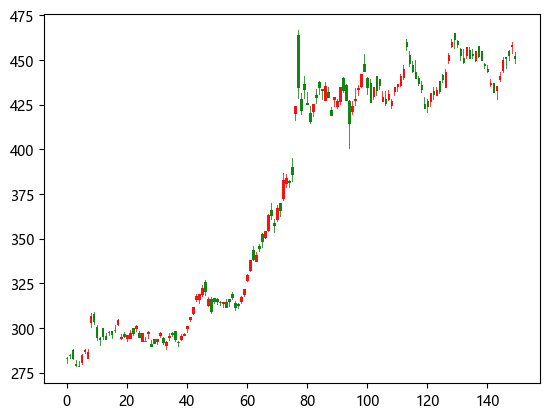

In [2]:
fig, ax = plt.subplots(1,1)

candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'], 
                  width=0.5, colorup='r', colordown='g', alpha=0.75)

In [8]:
df['High'].max()*1.05, df['Low'].min()*0.95

(489.82500000000005, 264.575)

C:\Users\Lo yuan\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


[*********************100%***********************]  1 of 1 completed


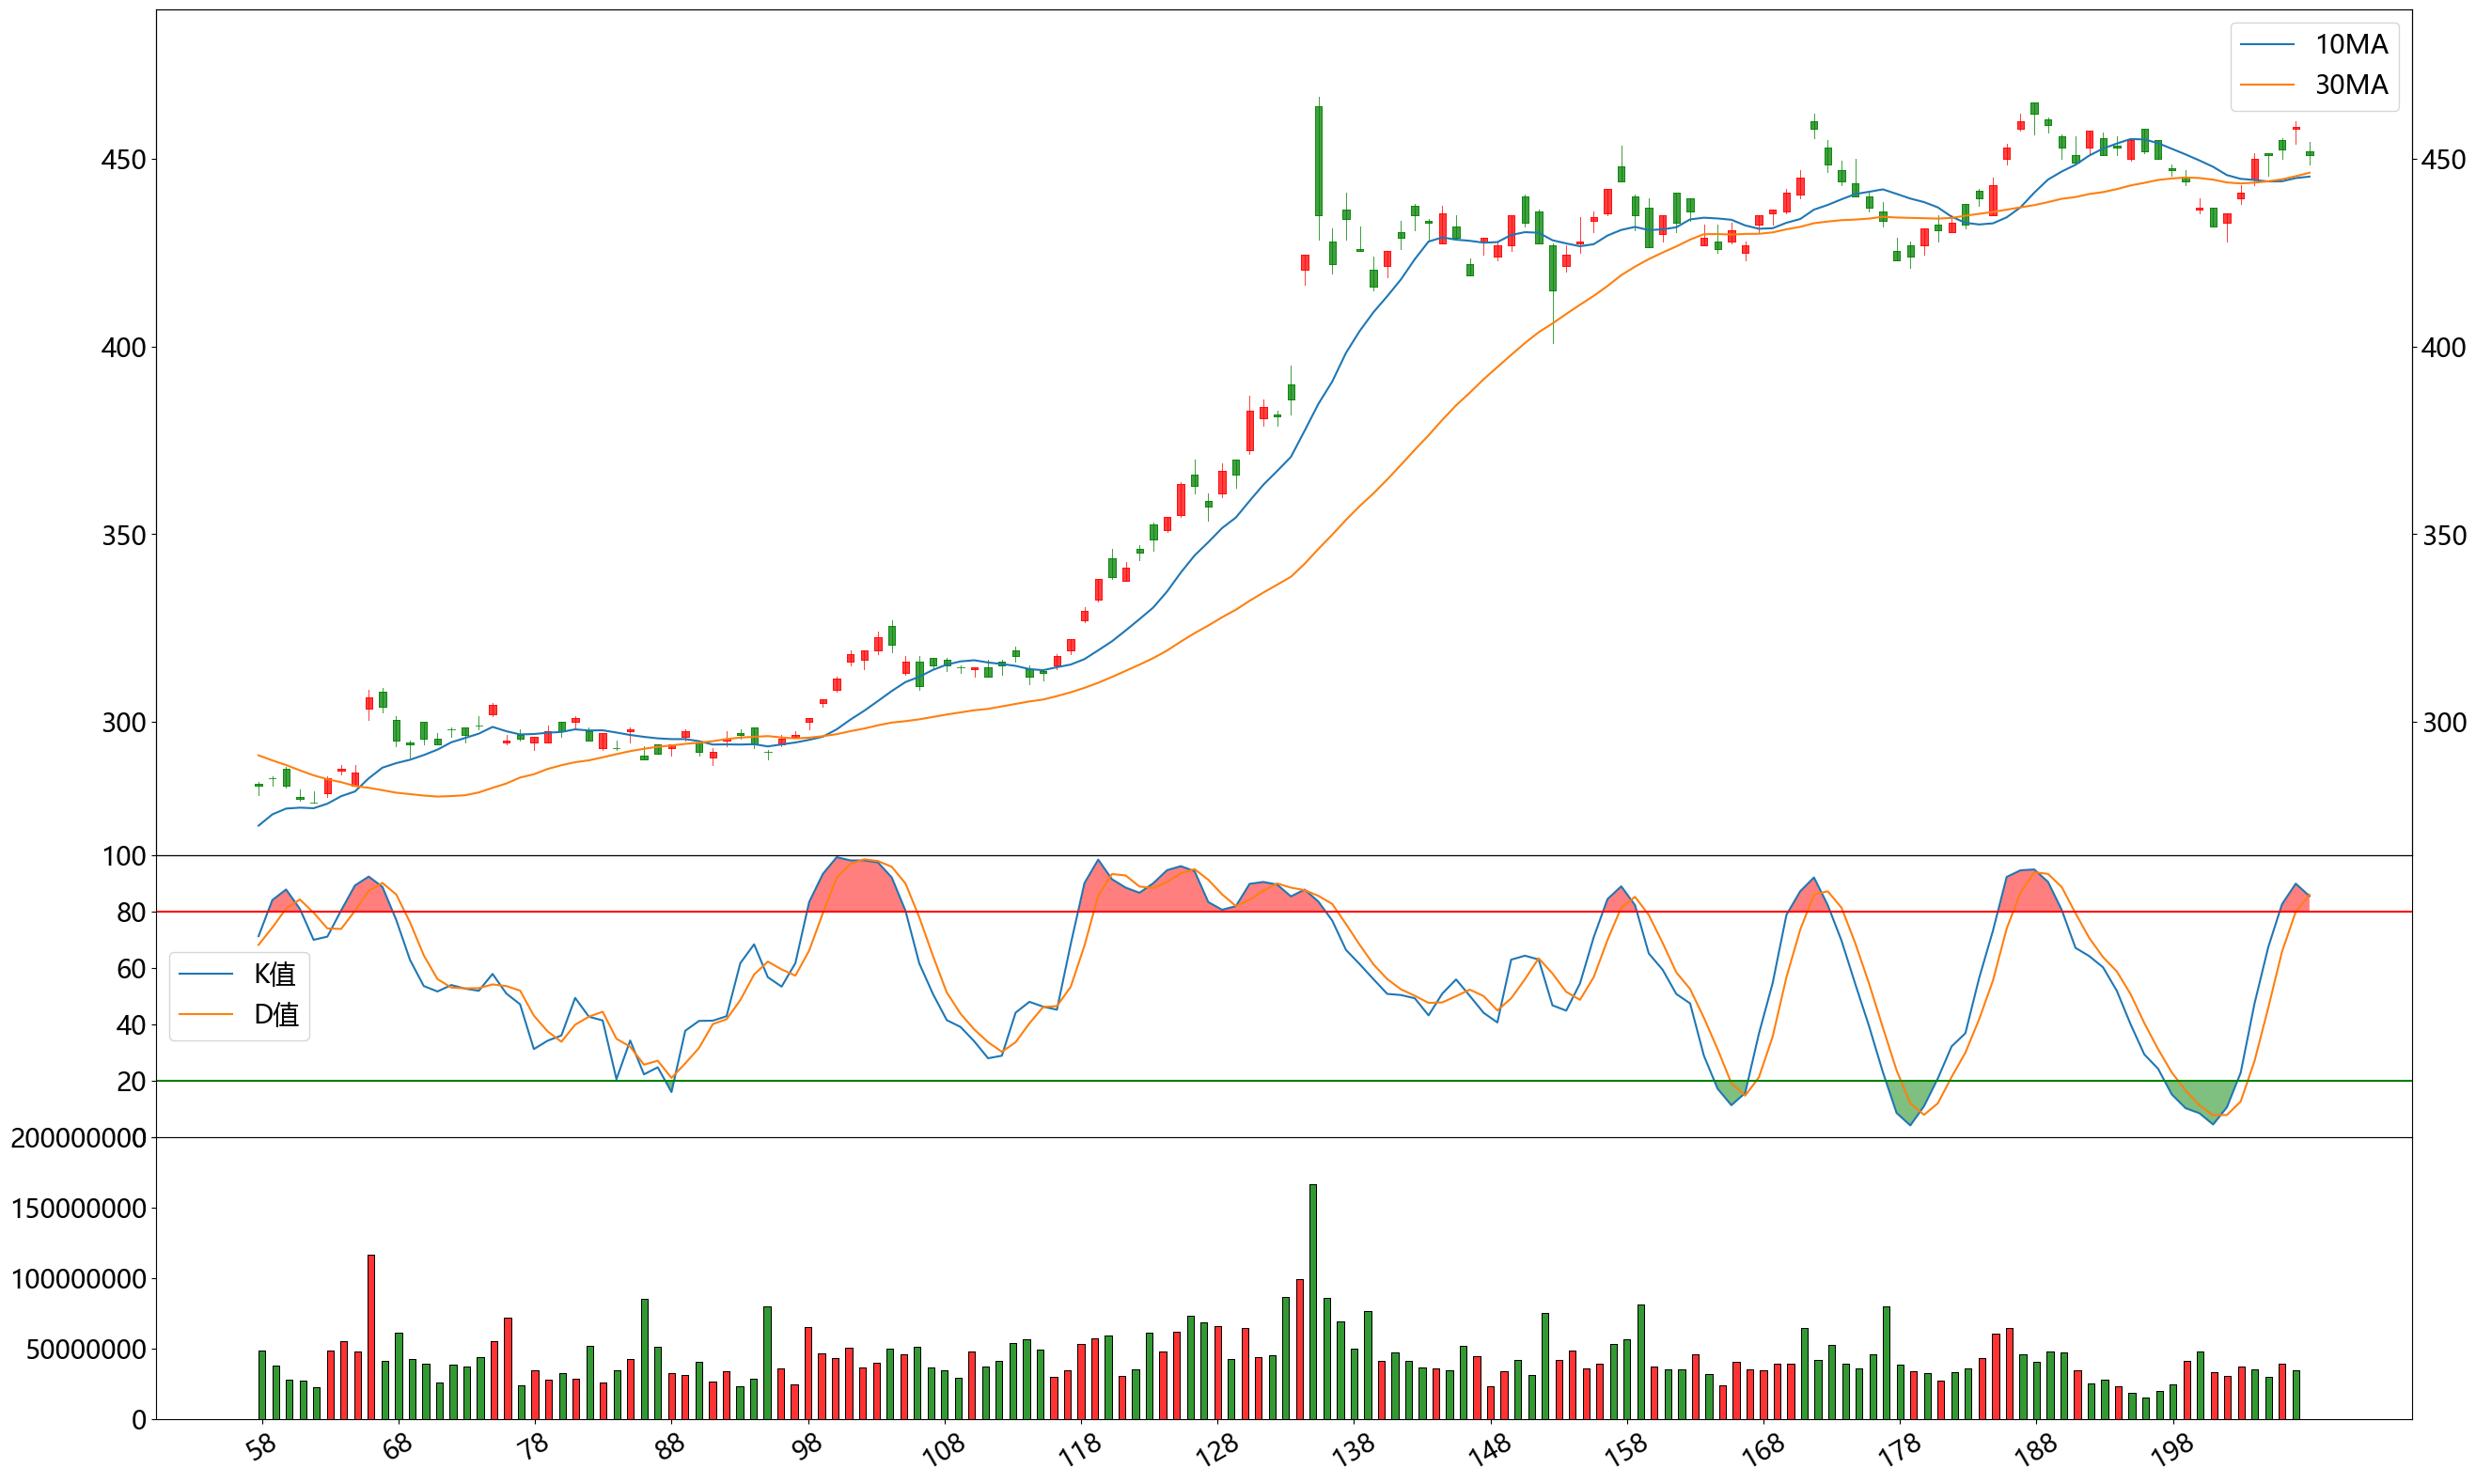

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpl_finance as mpf
from mplfinance.original_flavor import candlestick2_ohlc, volume_overlay
import talib
import numpy as np
from pandas_datareader import data as pdr
#from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import yfinance as yfin
    
#設定字型
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False 

#取得資料
yfin.pdr_override()
start = '2020-01-01'
end = '2020-11-11'
df = pdr.get_data_yahoo('2330.TW', start, end)
df = df.reset_index()

#計算移動平均
df['10MA'] = talib.SMA(np.array(df['Close']), 10)
df['30MA']  = talib.SMA(np.array(df['Close']), 30)

#計算KD，指定933
df['k'], df['d'] = talib.STOCH(df['High'], df['Low'], df['Close'], fastk_period = 9,slowk_period = 3,slowd_period=3)

#取得最新150資料
df = df.tail(150)

#日期轉換成字串
x = df['Date'].dt.strftime('%Y-%m-%d')

#建立繪圖區域
fig = plt.figure(figsize=(24, 30))

#用add_axes新增子區域
#left, bottom, width, height = 0,0.3,1,0.4
# x, y, ,width, height
ax =  fig.add_axes([0, 0.3, 1, 0.3], xticklabels=[])                
##左下角座標 (0,0.3)，寬高 (1,0.3), xticklabels=[]把刻度拿掉

ax2 = fig.add_axes([0, 0.2, 1, 0.1], xticklabels=[], ylim=(0, 100)) ##左下角座標 (0,0.1)，寬高 (1,0.3)
ax3 = fig.add_axes([0, 0.1, 1, 0.1], ylim=(0, 2*1e+8))            ##左下角座標 (0,0)，寬高 (1,0.1)

# 若安裝mpl_finance，可使用 mpf.candlestick2_ochl
#mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'], df['Low'], 
#                      width=0.5, colorup='r', colordown='g', alpha=0.75)

candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'], 
                  width=0.5, colorup='r', colordown='g', alpha=0.75)

#搭配上面繪製K線，X軸資料不是日期的問題與解決K線日期不連續
ax.set_xticks(range(0, len(x)))
ax.set_xticklabels(x, rotation=30)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(df['Low'].min()*0.95, df['High'].max()*1.05)

#建立次Y軸資料
ax1 = ax.twinx()
ax1.plot(x, df['10MA'], label='10MA')
ax1.plot(x, df['30MA'], label='30MA')
ax1.tick_params(axis='y', labelsize=20)
ax1.legend(fontsize=20)
ax1.set_ylim(df['Low'].min()*0.95, df['High'].max()*1.05)

#KD
#ax2.set_xticks(range(0, len(df.index), 10))
#ax2.set_xticklabels(df.index[::10])

#畫KD，並劃出圖例
ax2.plot(x, df['k'], label='K值')
ax2.plot(x, df['d'], label='D值')
ax2.legend(fontsize=20)

ax2.axhline(y=20, color='g', linestyle='-') #水平參考線
ax2.axhline(y=80, color='r', linestyle='-') #水平參考線
ax2.tick_params(axis='y', labelsize=20)

ax2.fill_between(x, df['k'], 80, where= df['k'] >= 80, facecolor = "red", interpolate= True, alpha = 0.5)
ax2.fill_between(x, df['k'], 20, where= df['k'] <= 20, facecolor = "g", interpolate= True, alpha = 0.5)

#成交金額
#若安裝mpl_finance，可使用 mpf.volume_overlay
#mpf.volume_overlay(ax3, df['Open'], df['Close'], df['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
volume_overlay(ax3, df['Open'], df['Close'], df['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)

ax3.set_xticks(range(0, len(df.index), 10))
ax3.set_xticklabels(df.index[::10], rotation=30)
ax3.tick_params(axis='y', labelsize=20)
ax3.tick_params(axis='x', labelsize=20)
#
##ax3.yaxis.set_major_formatter(FormatStrFormatter('%.0f')) #關閉科學記號顯示
ax3.get_yaxis().get_major_formatter().set_scientific(False)#關閉科學記號顯示
fig.savefig('123.JPG', bbox_inches='tight',dpi=200)
##plt.show()

[*********************100%***********************]  1 of 1 completed


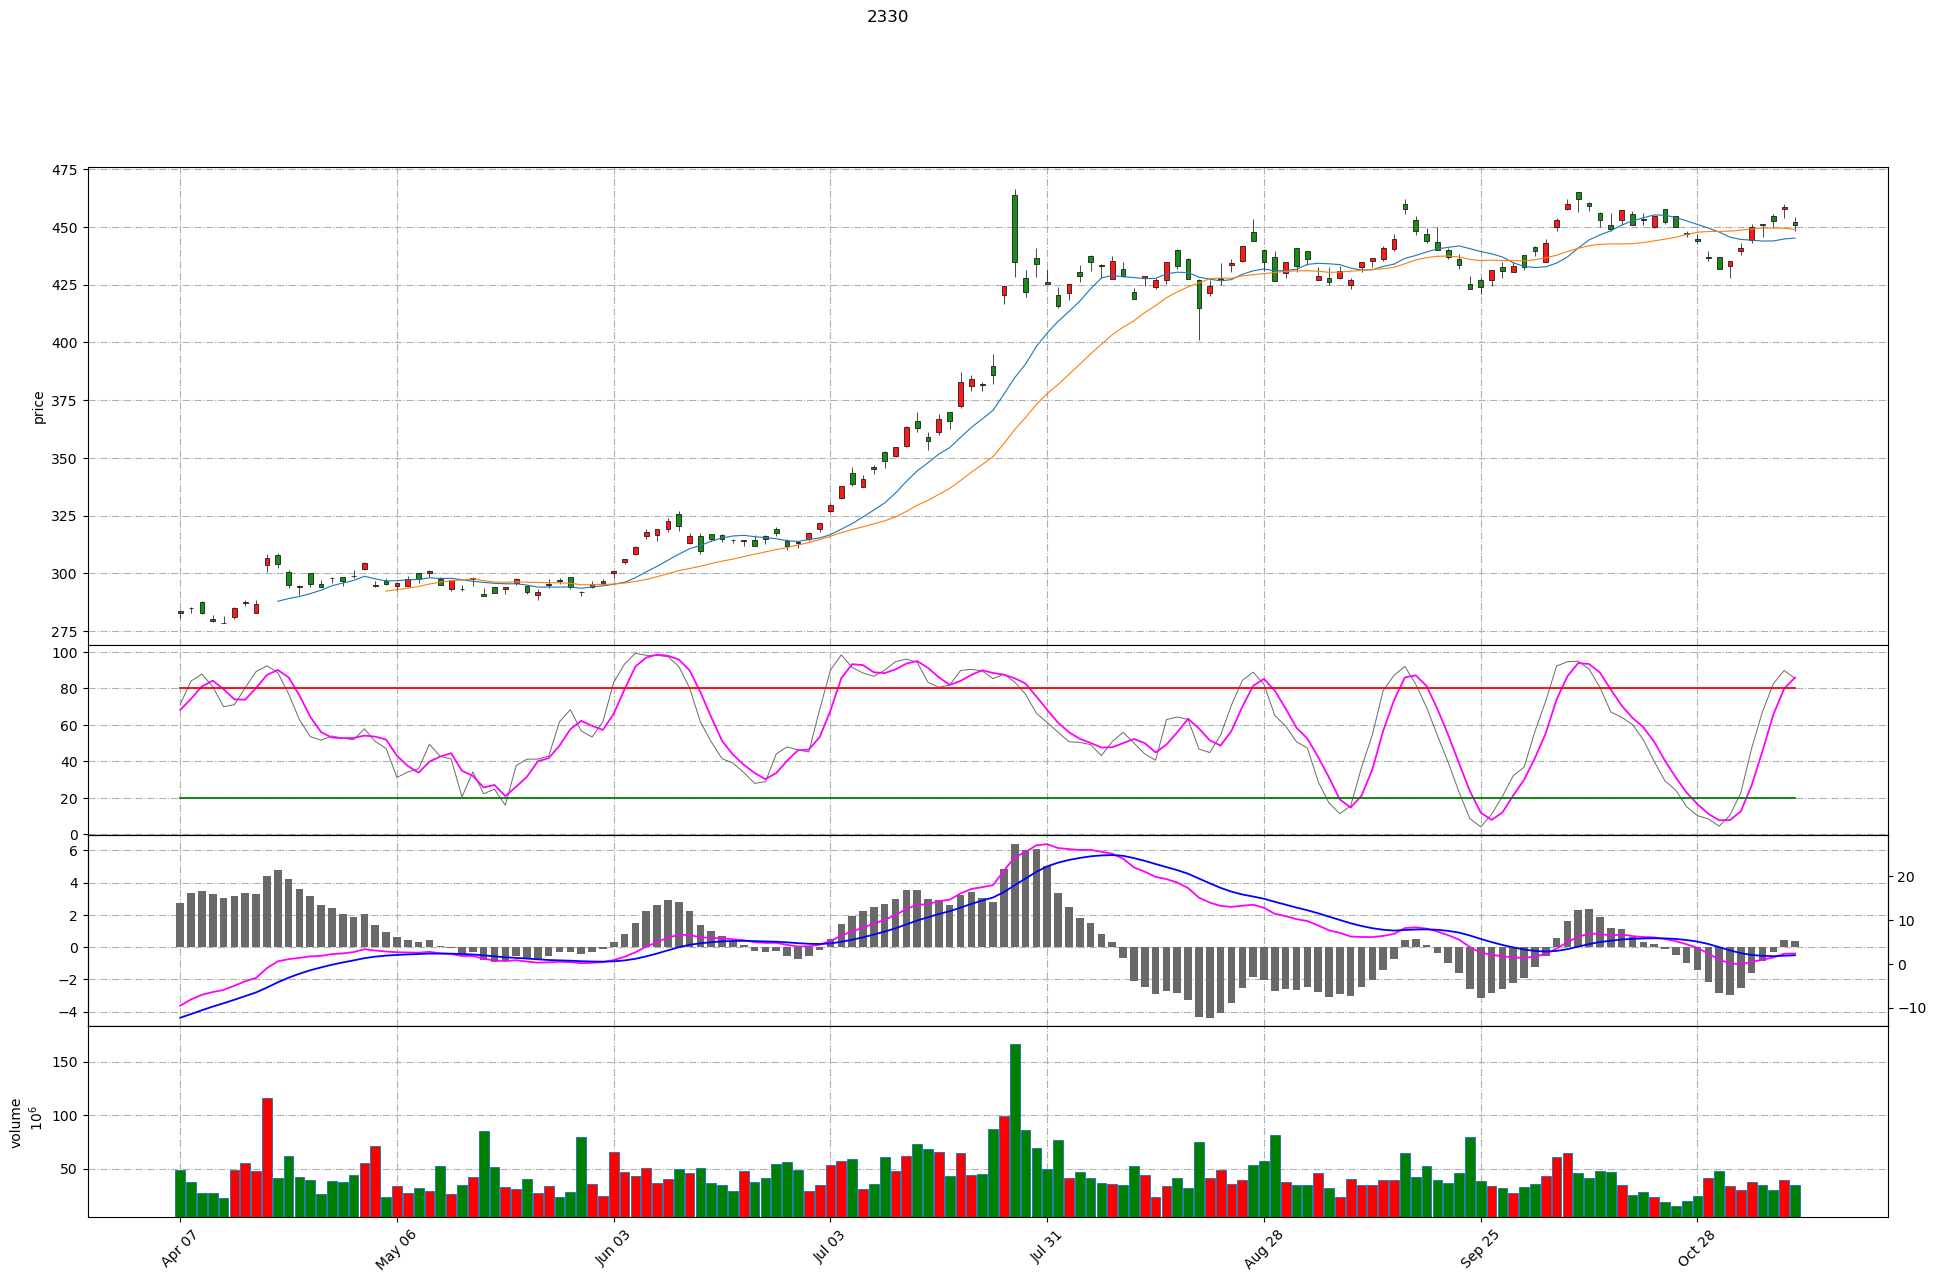

In [14]:
import mplfinance as mpf
from pandas_datareader import data as pdr
import talib
import yfinance as yfin

yfin.pdr_override()
start = '2020-01-01'
end = '2020-11-11'
df = pdr.get_data_yahoo('2330.TW', start, end)

#MACD
df['exp12'] = df['Close'].ewm(span=12, adjust= False).mean()
df['exp26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['macd'] = df['exp12'] - df['exp26']
df['signal'] = df['macd'].ewm(span=9, adjust=False).mean()
df['histogram'] = df['macd'] - df['signal']

df['MACD'], df['MACD_DIF'], df['HIST'] = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

#KD
df['k'], df['d'] = talib.STOCH(df['High'], df['Low'], df['Close'], fastk_period = 9,slowk_period = 3,slowd_period=3)
df['k'].fillna(value=0, inplace=True)
df['d'].fillna(value=0, inplace=True)
df['kd80'] = 80
df['kd20'] = 20
df = df.tail(150)

k = df['k']
d = df['d']
line80 = df['kd80']
line20 = df['kd20']
histogram = df['histogram']
macd = df['macd']
signal = df['signal']

linecolor = mpf.make_marketcolors(up = 'red', 
                                 down = 'green',                                 
                                 volume = {'up': 'red', 'down': 'green'})

figstyle = mpf.make_mpf_style(#base_mpf_style = 'yahoo', 
                              marketcolors = linecolor, 
                              gridaxis = 'both', 
                              gridstyle = '-.'
                              )

#exp12 = df['Close'].ewm(span=12, adjust=False).mean()
#exp26 = df['Close'].ewm(span=26, adjust=False).mean()
#macd = exp12 - exp26
#signal = macd.ewm(span=9, adjust=False).mean()
#histogram = macd - signal
#

add_plot = [
    #MACD
    mpf.make_addplot(histogram, type = 'bar', width = 0.7, panel = 2, color = 'dimgray', alpha = 1, secondary_y = False),
    mpf.make_addplot(macd, panel = 2, color = 'fuchsia', secondary_y = True),
    mpf.make_addplot(signal, panel = 2, color = 'b', secondary_y = True),
    
    #KD
    mpf.make_addplot(k, type = 'line', width = 0.7, panel = 1, color = 'dimgray'),
    mpf.make_addplot(d, panel = 1, color = 'fuchsia'), 
    mpf.make_addplot(line80, panel = 1, color = 'r'),
    mpf.make_addplot(line20, panel = 1, color = 'g'), 
]

mpf.plot(df, 
         type = 'candle',
         style = figstyle, 
         addplot = add_plot,
         volume = True,
         mav=[10, 20],
         #figscale=1.5,
         figsize = (25, 15), 
         title = '2330', 
         #figratio=(5, 5),
         ylabel = 'price',
         ylabel_lower = 'volume',
         main_panel = 0, 
         volume_panel = 3,
         num_panels = 4)
#mav是畫均線